In [4]:
# importing the libraries I will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loads dataframe containing league CSV file - this dataset contains the first 10 minutes of a game, all games are unique
league_df = pd.read_csv(r"C:\Users\brian\Desktop\Python_Data\high_diamond_ranked_10min.csv")

In [6]:
print(league_df.shape)
print(league_df.head())
print(league_df.tail())

(9879, 40)
       gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   

   redTowersDestroyed  redTotalGold  re

In [7]:
print(league_df.dtypes)

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [8]:
# Seperated the data for blue side
id_list = ["Wins", "WardsPlaced", "WardsDestroyed", "FirstBlood", "Kills", "Deaths", "Assists", "EliteMonsters", "Dragons",
          "Heralds", "TowersDestroyed", "TotalGold", "AvgLevel", "TotalExperience", "TotalMinionsKilled",
          "TotalJungleMinionsKilled", "GoldDiff", "ExperienceDiff", "CSPerMin", "GoldPerMin"]
blue_data = []
blue_data = pd.DataFrame(blue_data)
for i in id_list:
    blue_data[i] = league_df["blue"+i]
    

In [9]:
print(blue_data.head())

   Wins  WardsPlaced  WardsDestroyed  FirstBlood  Kills  Deaths  Assists  \
0     0           28               2           1      9       6       11   
1     0           12               1           0      5       5        5   
2     0           15               0           0      7      11        4   
3     0           43               1           0      4       5        5   
4     0           75               4           0      6       6        6   

   EliteMonsters  Dragons  Heralds  TowersDestroyed  TotalGold  AvgLevel  \
0              0        0        0                0      17210       6.6   
1              0        0        0                0      14712       6.6   
2              1        1        0                0      16113       6.4   
3              1        0        1                0      15157       7.0   
4              0        0        0                0      16400       7.0   

   TotalExperience  TotalMinionsKilled  TotalJungleMinionsKilled  GoldDiff  \
0       

In [10]:
# Creating red dataframe - notice how there is no redWins in the dataset? We will have to account for that
id_list2 = id_list[1:]
red_data = []
red_data = pd.DataFrame(red_data)
wins = [0 if each == 1 else 1 for each in blue_data["Wins"]]
red_data["Wins"] = wins
for i in id_list2:
    red_data[i] = league_df["red"+i]


In [11]:
print(red_data.head())

   Wins  WardsPlaced  WardsDestroyed  FirstBlood  Kills  Deaths  Assists  \
0     1           15               6           0      6       9        8   
1     1           12               1           1      5       5        2   
2     1           15               3           1     11       7       14   
3     1           15               2           1      5       4       10   
4     1           17               2           1      6       6        7   

   EliteMonsters  Dragons  Heralds  TowersDestroyed  TotalGold  AvgLevel  \
0              0        0        0                0      16567       6.8   
1              2        1        1                1      17620       6.8   
2              0        0        0                0      17285       6.8   
3              0        0        0                0      16478       7.0   
4              1        1        0                0      17404       7.0   

   TotalExperience  TotalMinionsKilled  TotalJungleMinionsKilled  GoldDiff  \
0       

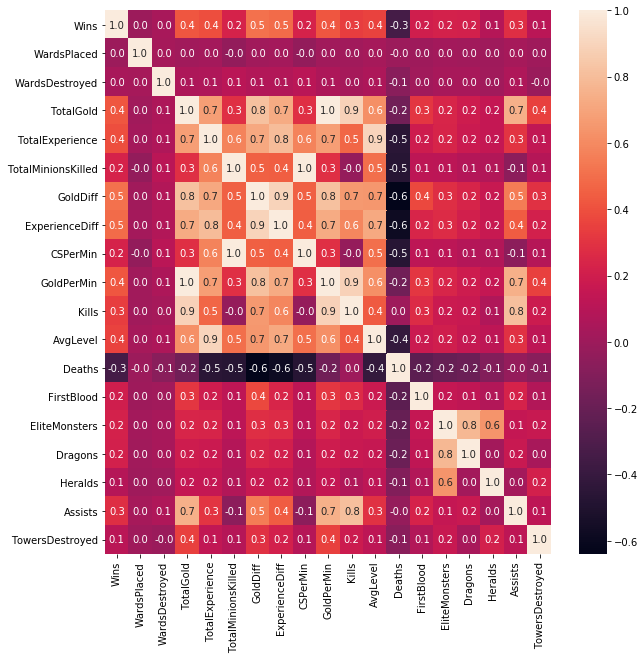

In [19]:
# Blue correlation
corr_list=["Wins","WardsPlaced","WardsDestroyed","TotalGold","TotalExperience","TotalMinionsKilled","GoldDiff","ExperienceDiff",
           "CSPerMin","GoldPerMin","Kills","AvgLevel","Deaths","FirstBlood","EliteMonsters","Dragons","Heralds","Assists",
           "TowersDestroyed"]
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(blue_data[corr_list].corr(), annot=True, fmt=".1f", ax=ax)
plt.show()

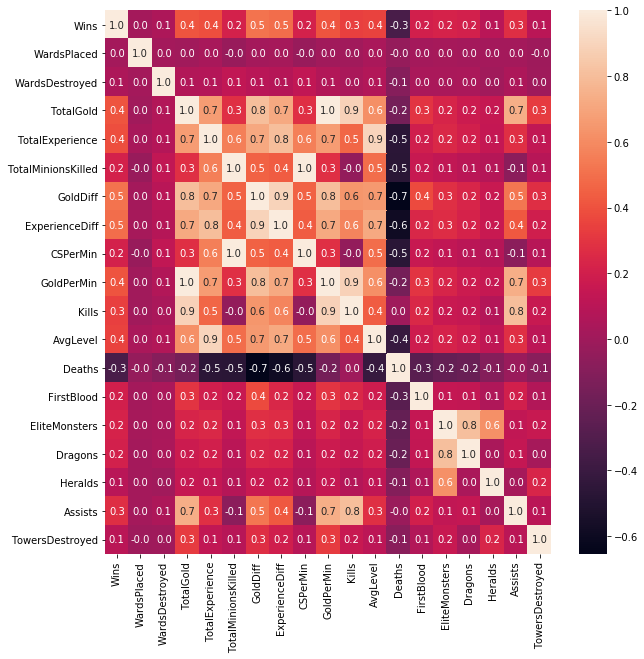

In [20]:
#Red Correlation
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(red_data[corr_list].corr(), annot=True, fmt=".1f", ax=ax)
plt.show()

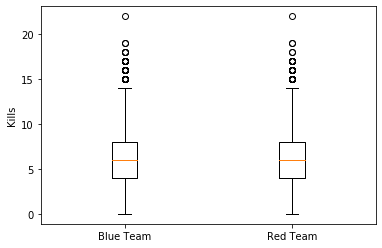

In [13]:
fig, ax = plt.subplots()
ax.boxplot([blue_data["Kills"], red_data["Kills"]])
ax.set_xticklabels(["Blue Team", "Red Team"])
ax.set_ylabel("Kills")
plt.show()

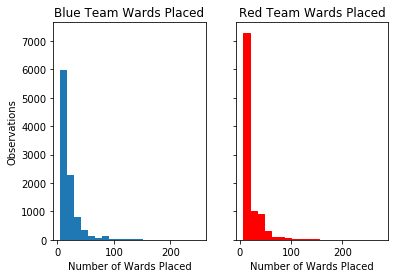

In [14]:
fig, ax = plt.subplots(1,2, sharey=True)
ax[0].hist(blue_data["WardsPlaced"], bins=20)
ax[0].set_xlabel("Number of Wards Placed")
ax[0].set_ylabel("Observations")
ax[0].set_title("Blue Team Wards Placed")

ax[1].hist(red_data["WardsPlaced"], bins=20, Color="r")
ax[1].set_xlabel("Number of Wards Placed")
ax[1].set_title("Red Team Wards Placed")
plt.show()

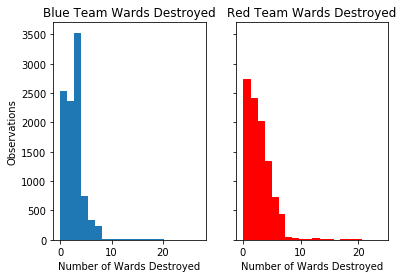

In [15]:
fig, ax = plt.subplots(1,2, sharey=True)
ax[0].hist(blue_data["WardsDestroyed"], bins=20)
ax[0].set_xlabel("Number of Wards Destroyed")
ax[0].set_ylabel("Observations")
ax[0].set_title("Blue Team Wards Destroyed")

ax[1].hist(red_data["WardsDestroyed"], bins=20, Color="r")
ax[1].set_xlabel("Number of Wards Destroyed")
ax[1].set_title("Red Team Wards Destroyed")
plt.show()